In [68]:
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 
from numpy import diag, ones, loadtxt

In [326]:
# question 1
n1 = 11 
d0 = -2 * np.ones(n1 - 2)
d1 = 5 * np.ones(n1)
d2 = -3 * np.ones(n1-2)
d3 = -1 * np.ones(n1-5)

A1 = diag(d0, -2) + diag(d1) + diag(d2, 2) + diag(d3,5)

Q1,R1 = np.linalg.qr(A1)

Q1check = np.linalg.norm((Q1.T @ Q1)- np.identity(n1), 2) 

b = np.arange(1, 12)
b = b[::-1]
y = Q1.T @ b 
xsol = np.linalg.solve(R1, y)
print(xsol)
rsol = A1@xsol - b
rnorm = np.linalg.norm(rsol, 1)
print(rnorm)
print(np.shape(rsol))

[18.97814248 15.81188301 23.05101644 18.41194001 19.72457047 14.73766308
 13.82359504  9.12508583  8.22294476  4.05003433  3.4891779 ]
1.305622276959184e-13
(11,)


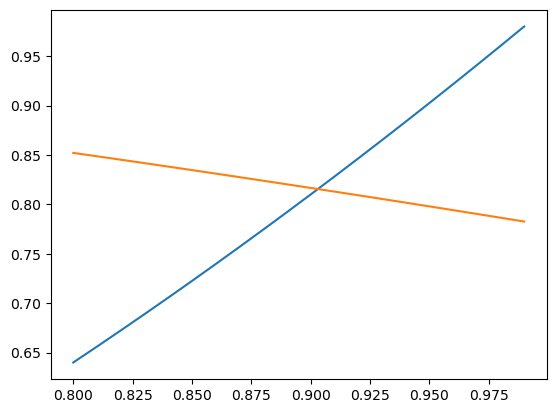

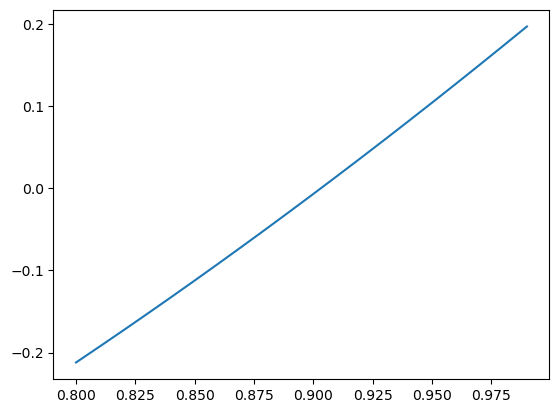

In [66]:
# Questio 2 
f1 = lambda x: x**2 
f2 = lambda x: np.exp(-x**2/4)

x = np.arange(0.8, 1, 0.01)

plt.figure(2)
plt.plot(x, f1(x))
plt.plot(x, f2(x))
plt.show()
# point on intersection is 0.9 
f = lambda x : f1(x) - f2(x)
deriv = lambda x: 2*x - 0.5*x*f2(x)
x0 = 0.9 
x1 = x0 - f(x0) / deriv(x0)

plt.figure(2)
plt.plot(x, f(x))
plt.show()

/var/folders/0m/tjm8n82117bg4plwvf105j2h0000gn/T/ipykernel_43020/1886802423.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol = np.linalg.lstsq(A, np.log(ydata))


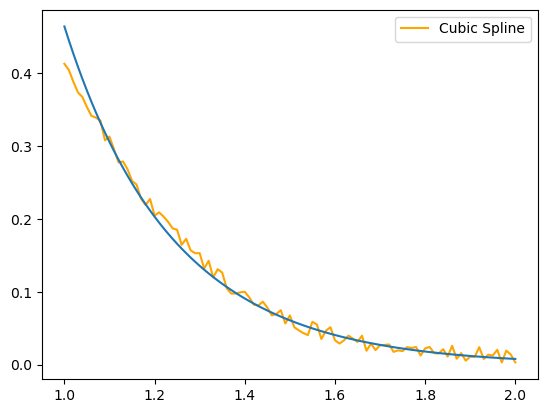

[[ 1.         -1.          0.        ]
 [ 1.         -1.0201      0.00995033]
 [ 1.         -1.0404      0.01980263]
 [ 1.         -1.0609      0.0295588 ]
 [ 1.         -1.0816      0.03922071]
 [ 1.         -1.1025      0.04879016]
 [ 1.         -1.1236      0.05826891]
 [ 1.         -1.1449      0.06765865]
 [ 1.         -1.1664      0.07696104]
 [ 1.         -1.1881      0.0861777 ]
 [ 1.         -1.21        0.09531018]
 [ 1.         -1.2321      0.10436002]
 [ 1.         -1.2544      0.11332869]
 [ 1.         -1.2769      0.12221763]
 [ 1.         -1.2996      0.13102826]
 [ 1.         -1.3225      0.13976194]
 [ 1.         -1.3456      0.14842001]
 [ 1.         -1.3689      0.15700375]
 [ 1.         -1.3924      0.16551444]
 [ 1.         -1.4161      0.17395331]
 [ 1.         -1.44        0.18232156]
 [ 1.         -1.4641      0.19062036]
 [ 1.         -1.4884      0.19885086]
 [ 1.         -1.5129      0.20701417]
 [ 1.         -1.5376      0.21511138]
 [ 1.         -1.5625    

In [360]:
# question 3
import scipy.io
mat = scipy.io.loadmat('./MATH5335-2017/data.mat')
tdata = np.array(mat['tdata']).flatten()
ydata = np.array(mat['ydata']).flatten()
ndata = len(tdata)
A = np.ones((ndata,3)) 
A[:, 1] = -tdata**2
A[:, 2] = np.log(tdata)
sol = np.linalg.lstsq(A, np.log(ydata))
xls = sol[0]
xls[0] = np.exp(xls[0])

cs = scipy.interpolate.CubicSpline(tdata, ydata)
y = lambda t: xls[0] * np.exp(-xls[1]*t**2) * t**xls[2]
plt.figure()
#plt.plot(tdata, y(tdata))
plt.plot(tdata, cs(tdata), color='orange', label='Cubic Spline')
plt.plot(tdata, y(tdata))
plt.legend()
plt.show()
print(A)

In [358]:
import numpy as np

# Assuming tdatasol and ydatasol are numpy arrays
tdata = np.array(tdata).reshape(-1, 1)  # Make sure tdatasol is a column vector
ydata = np.array(ydata).reshape(-1, 1)
ndatasol = tdata.shape[0]

# Constructing the matrix Asol
Asol = np.hstack([np.ones((ndata, 1)), -tdata**2, np.log(tdata)])
norm = np.linalg.norm(A - Asol, np.inf)

0.0


In [174]:
# Question 4 
f = lambda x: x**3 + np.exp(np.sin(x))
sol1 = scipy.integrate.quad(f, 0, 1)
II = sol1[0]
NI = 1000
xI = np.linspace(0,1, NI + 1)
h = np.abs(xI[0] - xI[1])
w = np.ones(NI + 1)
for index,value in enumerate(w):
    if index % 2:
        w[index] = 4
    else:
        w[index] = 2

w[0] = 1
w[NI] = 1

IS = h/3 * w@f(xI) 
Q = II - IS
print(f"II - IS = {Q}")


II - IS = 2.2648549702353193e-14


TypeError: 'list' object cannot be interpreted as an integer

In [292]:
# Question 5
N = 10**3 
d2 = np.ones(N)
d1 = (-2 + (np.exp(-1/N)/N**2)) * np.ones(N-1)
d1[0] = -1
d0 = np.ones(N-2)
B = diag(d2) + diag(d1, -1) + diag(d0, -2)
xsol = np.arange(1, N) / N
q5gsolv = xsol**2 + np.exp(xsol)
b = np.concatenate(([1], [1/Nsol], Nsol**(-2) * q5gsolv))
